In [6]:
import pandas as pd 

In [14]:
import pandas as pd

data = pd.read_excel(
    'Analysis_Figures.xlsx', 
    sheet_name='Analysis',  
    header=0,             
    skiprows=None,        
    na_values=None,       
    usecols=None,         
    #on_bad_lines='skip', 
    dtype=None           
)

print(data.head())

# Print the total number of articles
print(f"Nombre total d'articles = {len(data)}")



                                       Article_title  \
0                                                NaN   
1                     Neural Airport Ground Handling   
2  A Memetic Algorithm for the Green Vehicle Rout...   
3  Interterminal Truck Routing Optimization Using...   
4  An Artificial-Immune-System-Based Algorithm En...   

                                             Authors  \
0                                                NaN   
1  Y. Wu; J. Zhou; Y. Xia; X. Zhang; Z. Cao; J. Z...   
2  Peng, Bo; Zhang, Yuan; Gajpal, Yuvraj; Chen, X...   
3   Adi, Taufik N.; Bae, Hyerim; Iskandar, Yelita A.   
4  Achamrah, Fatima E.; Riane, Fouad; Sahin, Evre...   

                                             Journal  Publication year  \
0                                                NaN               NaN   
1  IEEE Transactions on Intelligent Transportatio...            2023.0   
2                                     Sustainability            2019.0   
3                             

In [8]:
for index, row in data.iterrows():
  print("The main articles:", index, row['Article_title'] )

The main articles: 0 nan
The main articles: 1 Neural Airport Ground Handling
The main articles: 2 A Memetic Algorithm for the Green Vehicle Routing Problem
The main articles: 3 Interterminal Truck Routing Optimization Using Cooperative Multiagent Deep Reinforcement Learning
The main articles: 4 An Artificial-Immune-System-Based Algorithm Enhanced with Deep Reinforcement Learning for Solving Returnable Transport Item Problems
The main articles: 5 A Machine Learning-Based Approach for Multi-AGV Dispatching at Automated Container Terminals
The main articles: 6 Heuristics and Learning Models for Dubins MinMax Traveling Salesman Problem
The main articles: 7 Active Debris Removal Mission Planning Method Based on Machine Learning
The main articles: 8 A multi-agent based cooperative approach to scheduling and routing
The main articles: 9 Synchromodal freight transport re-planning under service time uncertainty: An online model-assisted reinforcement learning
The main articles: 10 Multi-armed b

In [9]:
for index, row in data.iterrows(): 
    print(row['Journal'])

total_journals = len(data['Journal'].unique())
print("Total number of journals:", total_journals)  

nan
IEEE Transactions on Intelligent Transportation Systems
Sustainability
Processes
Sustainability
Journal of Marine Science and Engineering
Sensors
Mathematics
European Journal of Operational Research
Transportation Research Part C: Emerging Technologies
European Journal of Operational Research
Expert Systems with Applications
Computers & Operations Research
Applied Soft Computing
Journal of Management Analytics
IEEE Transactions on Intelligent Transportation Systems
IEEE/CAA Journal of Automatica Sinica
Complexity
PeerJ Computer Science
International Journal of Computers, Communications and Control
Optimization Letters
Mathematics
Swarm and Evolutionary Computation
Computers & Operations Research
Expert Systems with Applications
Expert Systems with Applications
Knowledge-Based Systems
Computers & Industrial Engineering
Engineering Applications of Artificial Intelligence
Transportation Research Part C: Emerging Technologies
Artificial Intelligence
Applied Soft Computing
Computers & O

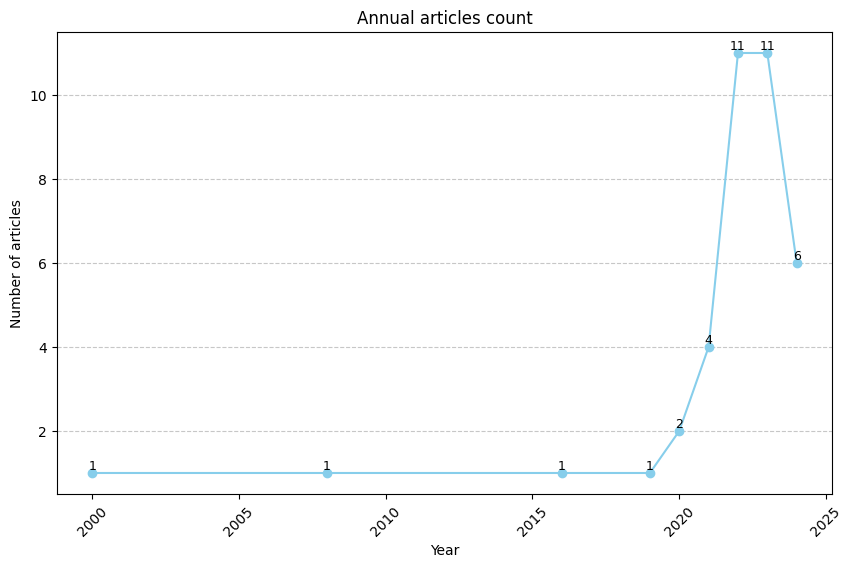

In [23]:
import matplotlib.pyplot as plt

# Clean NaN values in 'Publication year' column (replace with a default year or drop NaN rows)
data = data.dropna(subset=['Publication year'])

# Convert the 'Publication year' column to integers
data['Publication year'] = data['Publication year'].astype(int)

# Calculate the count of articles per year
year_counts = data['Publication year'].value_counts().sort_index()

# Create a line plot of the number of articles per year
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', color='SkyBlue')  

# Add numbers on top of the dots
for i, value in enumerate(year_counts.values):
    plt.text(year_counts.index[i], value, str(value), fontsize=9, ha='center', va='bottom')

plt.title('Annual articles count')
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Annual_articles.png', bbox_inches='tight')
plt.show()




In [11]:
def calculate_article_counts(data):
    """
    Calculate the number of articles per year.
    
    Parameters:
        df (DataFrame): DataFrame containing the publication data.
        
    Returns:
        article_counts (Series): Series containing the count of articles per year.
    """
    article_counts = data['Publication year'].value_counts().sort_index()
    return article_counts
# Call the function to calculate the number of articles per year
article_counts = calculate_article_counts(data)

# Print the result
print("Annual Articles Count:")
print(article_counts)

Annual Articles Count:
Publication year
2000     1
2008     1
2016     1
2019     1
2020     2
2021     4
2022    11
2023    11
2024     6
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

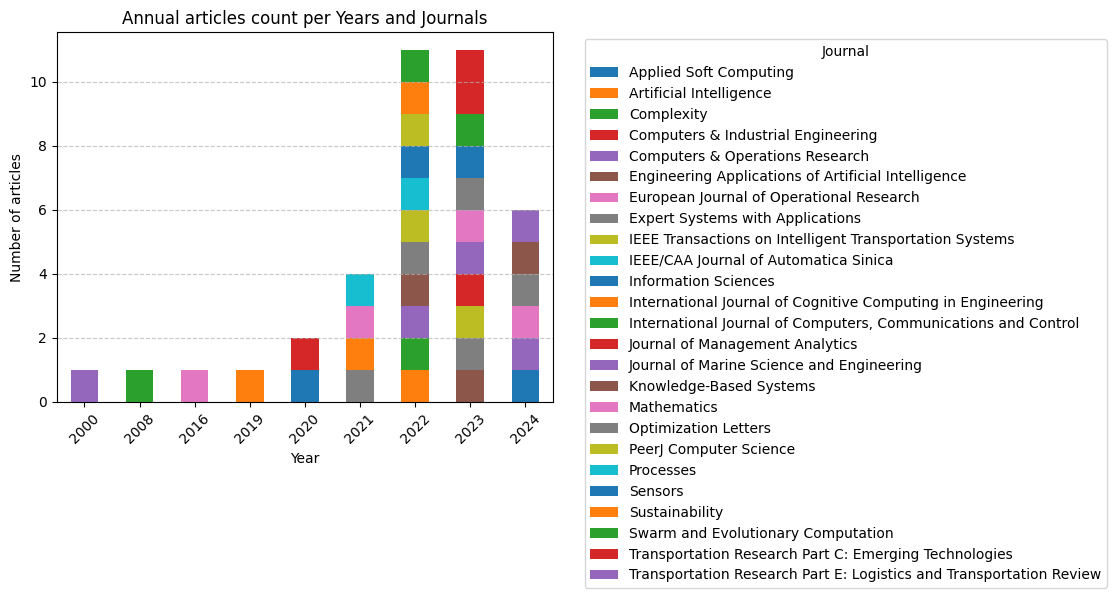

In [12]:
journal_articles_count = data.groupby(['Publication year', 'Journal']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
journal_articles_count.plot(kind='bar', stacked=True)
plt.title('Annual articles count per Years and Journals')
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.legend(title='Journal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Annual articles count per Years and Journals.png', bbox_inches='tight')
plt.show()

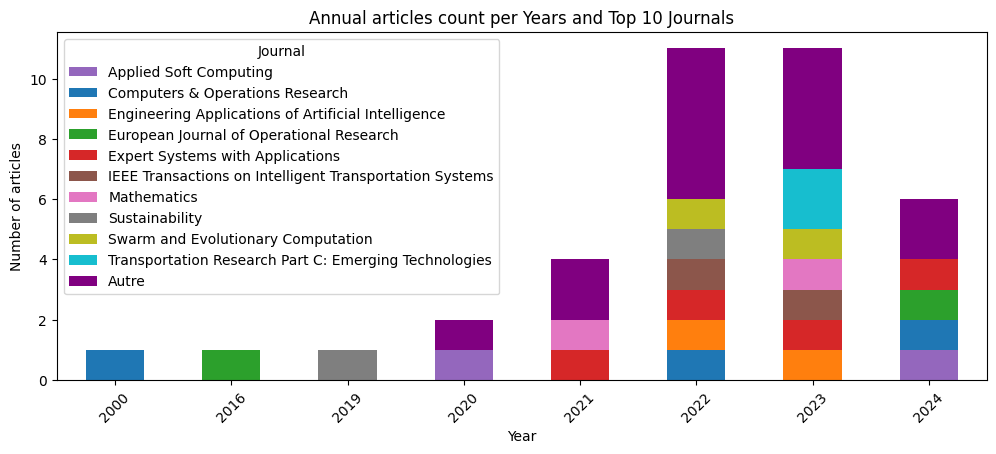

In [13]:
# Compter le nombre d'articles par journal
journal_counts = data['Journal'].value_counts()

# Sélectionner les 10 journaux les plus publiants
top_journals = journal_counts.head(10).index

# Filtrer le DataFrame pour inclure uniquement les données correspondant aux 10 journaux les plus publiants
filtered_dh = data[data['Journal'].isin(top_journals)]

# Clean NaN values in 'Publication year' column (replace with a default year or drop NaN rows)
data = data.dropna(subset=['Publication year'])

# Convert the 'Publication year' column to integers
data['Publication year'] = data['Publication year'].astype(int)

# Grouper les données par année et par journal, puis compter le nombre d'articles dans chaque groupe
journal_articles_count_by_year = filtered_dh.groupby(['Publication year', 'Journal']).size().unstack(fill_value=0)

# Ajouter une colonne "Autre" pour les journaux qui ne font pas partie des 10 journaux les plus publiants
other_journals = data[~data['Journal'].isin(top_journals)]
other_journals_count_by_year = other_journals.groupby('Publication year').size()
journal_articles_count_by_year['Autre'] = other_journals_count_by_year
journal_articles_count_by_year.fillna(0, inplace=True)


colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#800080']

# Tracer le graphique
fig, ax = plt.subplots(figsize=(12, 6))
journal_articles_count_by_year.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Annual articles count per Years and Top 10 Journals')
ax.set_xlabel('Year')
ax.set_ylabel('Number of articles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.3)
plt.savefig('Annual articles count per Years and Top 10 Journals.png', bbox_inches='tight')
plt.show()